In [73]:
import pandas as pd
from pathlib import Path

import requests
from zipfile import ZipFile
import matplotlib.pyplot as plt

In [4]:
wd = Path('projects/google-ads')
downloads = Path(wd / 'downloads')
resultados = Path(wd / 'resultados')

for folder in [downloads, resultados]:
    if not folder.exists():
        folder.mkdir(parents=True)

# Carregamento dos dados

In [7]:
political_ads = requests.get('https://storage.googleapis.com/political-csv/google-political-ads-transparency-bundle.zip')

with open(downloads / 'google-political-ads-transparency-bundle.zip', mode='wb') as f:
    f.write(political_ads.content)

with ZipFile(downloads / 'google-political-ads-transparency-bundle.zip', mode='r') as z:
    z.extractall(downloads)

In [16]:
valid_rows = []
for row in pd.read_csv(downloads / 'google-political-ads-creative-stats.csv', chunksize=10_000):
    valid = row[row['Regions'] == 'BR']
    valid_rows.append(valid)

In [65]:
google_df = (
    pd.concat(valid_rows)
    .reset_index(drop=True)
    .drop(columns=[
        'Spend_Range_Min_EUR', 'Spend_Range_Max_EUR', 'Spend_Range_Min_INR', 'Spend_Range_Max_INR',
        'Spend_Range_Min_BGN', 'Spend_Range_Max_BGN', 'Spend_Range_Min_CZK', 'Spend_Range_Max_CZK',
        'Spend_Range_Min_DKK', 'Spend_Range_Max_DKK', 'Spend_Range_Min_HUF', 'Spend_Range_Max_HUF',
        'Spend_Range_Min_PLN', 'Spend_Range_Max_PLN', 'Spend_Range_Min_RON', 'Spend_Range_Max_RON',
        'Spend_Range_Min_SEK', 'Spend_Range_Max_SEK', 'Spend_Range_Min_GBP', 'Spend_Range_Max_GBP',
        'Spend_Range_Min_NZD', 'Spend_Range_Max_NZD', 'Spend_Range_Min_ILS', 'Spend_Range_Max_ILS',
        'Spend_Range_Min_AUD', 'Spend_Range_Max_AUD', 'Spend_Range_Min_TWD', 'Spend_Range_Max_TWD',
        'Spend_Range_Min_ARS', 'Spend_Range_Max_ARS', 'Spend_Range_Min_ZAR', 'Spend_Range_Max_ZAR',
        'Age_Targeting', 'Gender_Targeting', 'Geo_Targeting_Included', 'Geo_Targeting_Excluded',
        'Ad_Campaigns_List', 'Impressions', 'Num_of_Days', 'First_Served_Timestamp', 'Last_Served_Timestamp',
        'Spend_USD', 'Spend_Range_Min_USD', 'Spend_Range_Max_USD', 'Unnamed: 54', 'Unnamed: 55']
        )
    )

google_df

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Date_Range_Start,Date_Range_End,Spend_Range_Min_BRL,Spend_Range_Max_BRL
0,CR03240749568693895169,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR16841022309027282945,ELEICAO 2022 BENNIO AUGUSTO ROSA DA SILVA SANT...,2022-09-14,2022-09-16,0,500.0
1,CR15022940250081067009,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR16841022309027282945,ELEICAO 2022 BENNIO AUGUSTO ROSA DA SILVA SANT...,2022-09-13,2022-09-22,0,500.0
2,CR16514214467903422465,https://adstransparency.google.com/advertiser/...,TEXT,BR,AR16841022309027282945,ELEICAO 2022 BENNIO AUGUSTO ROSA DA SILVA SANT...,2022-09-23,2022-10-01,500,1000.0
3,CR14753219052671336449,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR08726353404839854081,Maurício Wilker de Azevedo Barreto,2022-09-27,2023-03-10,0,500.0
4,CR03468860848062070785,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR08726353404839854081,Maurício Wilker de Azevedo Barreto,2022-09-29,2023-03-10,0,500.0
...,...,...,...,...,...,...,...,...,...,...
55501,CR14056513509731074049,https://adstransparency.google.com/advertiser/...,IMAGE,BR,AR16760514418374082561,Empresa Jornalistica O POVO SA,2022-09-10,2022-09-12,0,500.0
55502,CR16825193739633819649,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR16760514418374082561,Empresa Jornalistica O POVO SA,2022-09-09,2022-09-10,0,500.0
55503,CR03942233589168472065,https://adstransparency.google.com/advertiser/...,IMAGE,BR,AR16760514418374082561,Empresa Jornalistica O POVO SA,2022-09-06,2022-09-06,0,500.0
55504,CR12955704458234298369,https://adstransparency.google.com/advertiser/...,IMAGE,BR,AR16760514418374082561,Empresa Jornalistica O POVO SA,2022-09-09,2022-09-10,0,500.0


# Tratamento dos dados

In [66]:
# Converte valores monetários para centavos

google_df['Spend_Range_Min_BRL'] = google_df['Spend_Range_Min_BRL'] * 100
google_df['Spend_Range_Max_BRL'] = google_df['Spend_Range_Max_BRL'] * 100

# Recorta dataframe para o período desejado

google_df['Date_Range_Start'] = pd.to_datetime(google_df['Date_Range_Start'])
google_df['Date_Range_End'] = pd.to_datetime(google_df['Date_Range_End'])

google_df = google_df[
    (google_df['Date_Range_Start'] > '2023-01-01')
    & 
    (google_df['Date_Range_End'] < '2023-04-01')
    ]

google_df = google_df.reset_index(drop=True)

google_df

,Ad_ID,Ad_URL,Ad_Type,Regions,Advertiser_ID,Advertiser_Name,Date_Range_Start,Date_Range_End,Spend_Range_Min_BRL,Spend_Range_Max_BRL
0,CR18323923333487263745,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR15478211318942531585,VALMOR PEDROSO DA SILVA,2023-01-11,2023-01-13,0,50000.0
1,CR06995118470836781057,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR15478211318942531585,VALMOR PEDROSO DA SILVA,2023-01-03,2023-01-05,0,50000.0
2,CR10419697656321277953,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR02385522761452748801,Paulo Alexandre Pereira Barbosa,2023-01-22,2023-01-26,50000,100000.0
3,CR02436295459644375041,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR02385522761452748801,Paulo Alexandre Pereira Barbosa,2023-01-16,2023-01-19,0,50000.0
4,CR07909929737332457473,https://adstransparency.google.com/advertiser/...,VIDEO,BR,AR02385522761452748801,Paulo Alexandre Pereira Barbosa,2023-03-16,2023-03-20,0,50000.0
...,...,...,...,...,...,...,...,...,...,...
544,CR15289963933151002625,https://adstransparency.google.com/advertiser/...,IMAGE,BR,AR01622952898595913729,ELEICAO 2022 JOSE RENAN VASCONCELOS CALHEIROS ...,2023-03-08,2023-03-11,0,50000.0
545,CR04529868265828122625,https://adstransparency.google.com/advertiser/...,TEXT,BR,AR01622952898595913729,ELEICAO 2022 JOSE RENAN VASCONCELOS CALHEIROS ...,2023-03-11,2023-03-13,0,50000.0
546,CR05832396606774706177,https://adstransparency.google.com/advertiser/...,TEXT,BR,AR01622952898595913729,ELEICAO 2022 JOSE RENAN VASCONCELOS CALHEIROS ...,2023-01-16,2023-01-18,0,50000.0
547,CR02080417493154791425,https://adstransparency.google.com/advertiser/...,IMAGE,BR,AR01622952898595913729,ELEICAO 2022 JOSE RENAN VASCONCELOS CALHEIROS ...,2023-03-21,2023-03-27,0,50000.0


# Análise

<Axes: title={'center': 'Quantidade de anúncios por anunciante. Top 10.'}, ylabel='Nome do Anunciante'>

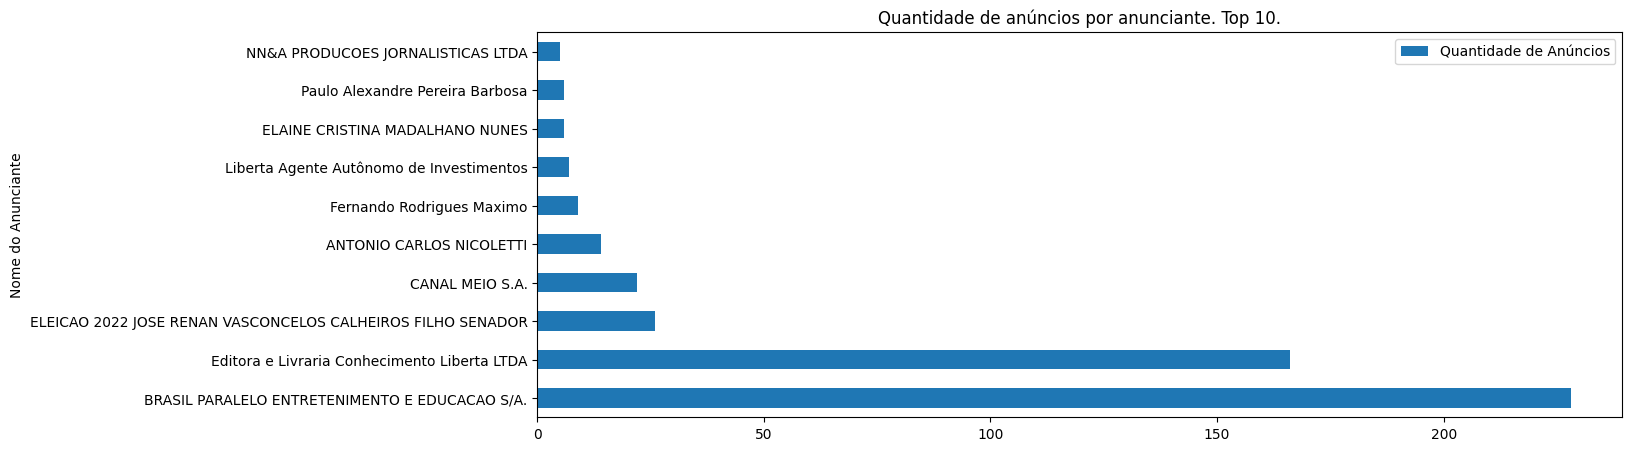

In [67]:
(
    google_df
    .groupby(['Advertiser_Name', 'Advertiser_ID'])
    ['Ad_ID']
    .count()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
    .rename(columns={
        'Advertiser_Name': 'Nome do Anunciante',
        'Ad_ID': 'Quantidade de Anúncios'
    })
    .plot(
        kind='barh',
        y='Quantidade de Anúncios',
        x='Nome do Anunciante',
        figsize=(14, 5),
        rot=0,
        title='Quantidade de anúncios por anunciante. Top 10.'

    )
)

In [81]:
gastos = (
    google_df
    .groupby(['Advertiser_Name', 'Advertiser_ID'])
    ['Spend_Range_Min_BRL', 'Spend_Range_Max_BRL']
    .sum()
    .sort_values(by='Spend_Range_Min_BRL', ascending=False)
    .head(10)
    .reset_index()
);

gastos

C:\Users\plasmatic\AppData\Local\Temp\ipykernel_17800\3960855834.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  google_df


,Advertiser_Name,Advertiser_ID,Spend_Range_Min_BRL,Spend_Range_Max_BRL
0,BRASIL PARALELO ENTRETENIMENTO E EDUCACAO S/A.,AR16104198129410113537,15850000,28300000.0
1,Editora e Livraria Conhecimento Liberta LTDA,AR16050225646223228929,5750000,14100000.0
2,CANAL MEIO S.A.,AR08197763602103402497,1050000,2150000.0
3,Fernando Rodrigues Maximo,AR13595773607472005121,600000,1050000.0
4,Liberta Agente Autônomo de Investimentos,AR03456694202144915457,400000,750000.0
5,WEVERTON ROCHA MARQUES DE SOUSA,AR11492512110982725633,150000,200000.0
6,MBL - Movimento Brasil Livre,AR18124232230673842177,150000,300000.0
7,Paulo Alexandre Pereira Barbosa,AR02385522761452748801,100000,400000.0
8,Danilo Mascarenhas de Balas,AR14574741514887364609,50000,100000.0
9,ELEICAO 2022 ITAMAR FRANCISCO MACHADO BORGES D...,AR03053199273274376193,50000,200000.0


Text(0, 0.5, 'Anunciantes')

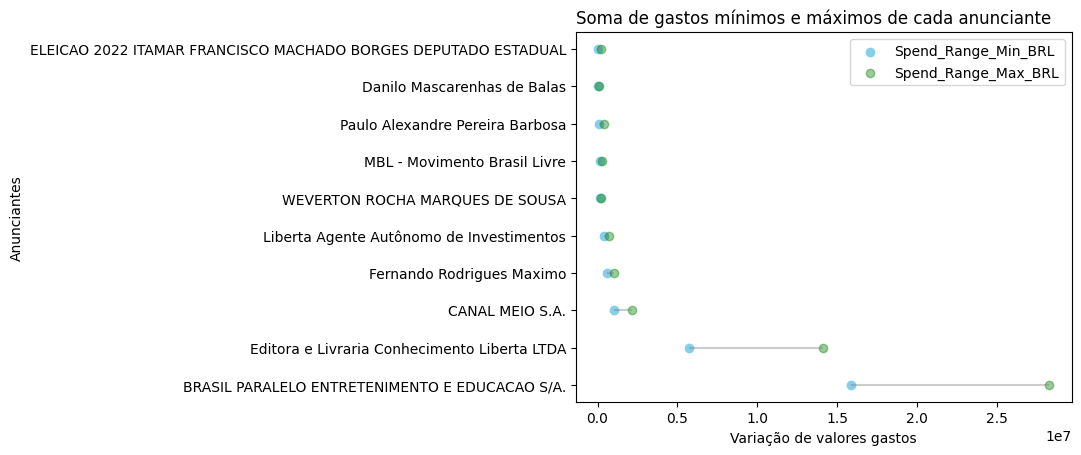

In [83]:
plot_range = range(1, len(gastos) + 1)

plt.hlines(y=plot_range, xmin=gastos['Spend_Range_Min_BRL'], xmax=gastos['Spend_Range_Max_BRL'], color='grey', alpha=0.4, )
plt.scatter(gastos['Spend_Range_Min_BRL'], plot_range, color='skyblue', alpha=1, label='Spend_Range_Min_BRL')
plt.scatter(gastos['Spend_Range_Max_BRL'], plot_range, color='green', alpha=0.4 , label='Spend_Range_Max_BRL')
plt.legend()

plt.yticks(plot_range, gastos['Advertiser_Name'])
plt.title("Soma de gastos mínimos e máximos de cada anunciante", loc='left')
plt.xlabel('Variação de valores gastos')
plt.ylabel('Anunciantes')

In [ ]:
google_df.to_csv(resultados / 'anuncios-veiculados-google-ads-entre-jan-e-abr-23.csv', index=False)